<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/Reinforcement_Learning_Monte_Carlo%2C_TD_Learning_and_Function_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@Misc{silver2015,author = {David Silver},title = {Lectures on
Reinforcement Learning},howpublished = {\textsc{url:}~\url
{https://www.davidsilver.uk/teaching/}},year = {2015}}

#Easy 21 Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

import pandas as pd
import seaborn as sns

In [54]:
#state: tuple (dealer_sum, player_sum)
#actions: a = 1 (hit), a = 0 (stick)

def step(state, a):
    dealer_sum, player_sum = state
    if a == 1:
        next_card = (np.random.choice([1, -1], p = [2/3, 1/3]), np.random.choice(range(1, 11)))
        #print(f'player next card: {next_card[0] * next_card[1]}')
        player_sum += next_card[0] * next_card[1]

        if player_sum < 1 or player_sum > 21:
            return (dealer_sum, player_sum), -1, True

        else:
            return (dealer_sum, player_sum), 0, False


    else:
        while dealer_sum < 17:
            next_card = (np.random.choice([1, -1], p = [2/3, 1/3]), np.random.choice(range(1, 11)))
            #print(f'dealer next card: {next_card[0] * next_card[1]}')
            dealer_sum += next_card[0] * next_card[1]

            if dealer_sum < 1 or dealer_sum > 21:
                return (dealer_sum, player_sum), 1, True

            if dealer_sum >= 17:
                difference = dealer_sum - player_sum
                match difference:
                    case _ if difference < 0:
                        r = 1
                    case _ if difference == 0:
                        r = 0
                    case _ if difference > 0:
                        r = -1
                return (dealer_sum, player_sum), r, True


In [ ]:
state = (np.random.choice(range(1, 11)), np.random.choice(range(1, 11)))
print(f'Initial State: {state}')
done = False
while not done:
    a = int(input("Input Next Action: "))
    state, r, done = step(state, a)
    print(f'State: {state} | reward: {r}')

Initial State: (3, 5)
Input Next Action: 1
State: (3, 15) | reward: 0
Input Next Action: 0
State: (18, 15) | reward: -1


In [ ]:
def eps_greedy_exploration(Q, state, n_s, n_0 = 100):
    eps = n_0 / (n_0 + n_s)
    p = np.random.random()
    if p < eps:
        next_a = np.random.choice([0, 1])
    else:
        next_a = Q[state].index(max(Q[state]))
    return next_a

In [ ]:
def generate_episode(Q, N_sa):
    episode = []
    state = (np.random.choice(range(1, 11)), np.random.choice(range(1, 22)))
    done = False
    while not done:
        a = eps_greedy_exploration(Q, state, sum(N_sa[state]))
        next_state, r, done = step(state, a)
        episode.append((state, a, r))
        state = next_state
    return episode

#Every-Step Monte Carlo Control

In [ ]:
Q = {}
N_sa = {}

for state in list(product(range(1,11), range(1, 22))):
    Q[state] = [0, 0]
    N_sa[state] = [0, 0]

In [ ]:
epochs = 100000
for _ in range(epochs):
    episode = generate_episode(Q, N_sa)
    G = 0
    for state, a, r in reversed(episode):
        G += r
        N_sa[state][a] += 1
        Q[state][a] += + 1/N_sa[state][a] * (G - Q[state][a])


In [ ]:
#state: tuple (dealer_sum, player_sum)
#actions: a = 0 (stick), a = 1 (hit)
Q

{(1, 1): [0.30126582278481, -0.13207547169811318],
 (1, 2): [0.4357798165137616, -0.28735632183908044],
 (1, 3): [0.3842592592592588, -0.1914893617021277],
 (1, 4): [0.327313769751693, -0.23762376237623767],
 (1, 5): [0.3041575492341358, -0.13636363636363635],
 (1, 6): [0.34106728538283054, 0.05714285714285714],
 (1, 7): [0.36796536796536783, 0.18367346938775508],
 (1, 8): [0.31639722863741304, 0.0901639344262296],
 (1, 9): [0.1807228915662651, 0.16216216216216206],
 (1, 10): [0.39080459770114956, 0.3963963963963963],
 (1, 11): [0.25657894736842063, 0.356902356902357],
 (1, 12): [0.38140417457305525, 0.2436974789915967],
 (1, 13): [0.4011976047904192, 0.08547008547008549],
 (1, 14): [0.32457786116322734, 0.18691588785046737],
 (1, 15): [0.3045267489711933, 0.07843137254901963],
 (1, 16): [0.2870905587668594, 0.019801980198019813],
 (1, 17): [0.4150537634408603, -0.2795698924731183],
 (1, 18): [0.5871743486973948, -0.2771084337349398],
 (1, 19): [0.7399193548387099, -0.2178217821782179]

In [ ]:
optimal_policy = {}
for state, values in Q.items():
    a = Q[state].index(max(Q[state]))
    optimal_policy[state] = a

In [ ]:
optimal_Vs = {}
for state, values in Q.items():
    value = max(Q[state])
    optimal_Vs[state] = value

In [ ]:
optimal_Vs

{(1, 1): 0.30126582278481,
 (1, 2): 0.4357798165137616,
 (1, 3): 0.3842592592592588,
 (1, 4): 0.327313769751693,
 (1, 5): 0.3041575492341358,
 (1, 6): 0.34106728538283054,
 (1, 7): 0.36796536796536783,
 (1, 8): 0.31639722863741304,
 (1, 9): 0.1807228915662651,
 (1, 10): 0.3963963963963963,
 (1, 11): 0.356902356902357,
 (1, 12): 0.38140417457305525,
 (1, 13): 0.4011976047904192,
 (1, 14): 0.32457786116322734,
 (1, 15): 0.3045267489711933,
 (1, 16): 0.2870905587668594,
 (1, 17): 0.4150537634408603,
 (1, 18): 0.5871743486973948,
 (1, 19): 0.7399193548387099,
 (1, 20): 0.8918918918918927,
 (1, 21): 0.9747706422018352,
 (2, 1): 0.21475054229934917,
 (2, 2): 0.1999999999999996,
 (2, 3): 0.22448979591836715,
 (2, 4): 0.2606837606837605,
 (2, 5): 0.28310502283105055,
 (2, 6): 0.24576271186440693,
 (2, 7): 0.2391799544419134,
 (2, 8): 0.21250000000000016,
 (2, 9): 0.2468619246861924,
 (2, 10): 0.27672955974842783,
 (2, 11): 0.3717277486910996,
 (2, 12): 0.31441048034934505,
 (2, 13): 0.26133909

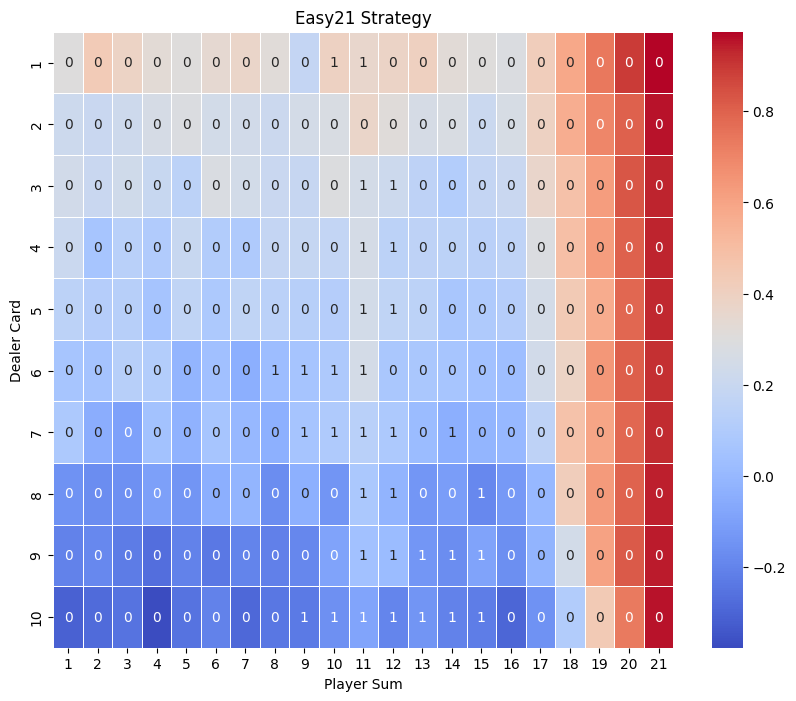

In [ ]:
data = np.zeros((10, 21))
labels = np.zeros((10, 21))
for i in range(10):
    for j in range(21):
        data[i, j] = optimal_Vs[(i+1, j+1)]
        labels[i, j] = optimal_policy[(i+1, j+1)]

df = pd.DataFrame(data, columns=[f'{i}' for i in range(1, 22)],
                  index=[f'{i}' for i in range(1, 11)])

# Step 3: Create the heatmap with custom labels
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=labels.astype('int'), cmap='coolwarm', fmt='', linewidths=.5)
plt.title('Easy21 Strategy')
ax.set_xlabel('Player Sum')
ax.set_ylabel('Dealer Card')
plt.show()

#SARSA(λ) Control

In [ ]:
lambdas = np.array(range(11))/10
epochs = 1000
Qs = []

for lbda in lambdas:
    Q = {}
    N_sa = {}

    for state in list(product(range(1,11), range(1, 22))):
        Q[state] = [0, 0]
        N_sa[state] = [0, 0]

    for epoch in range(epochs):
        E_sa = {}
        for state in list(product(range(1,11), range(1, 22))):
            E_sa[state] = [0, 0]

        state = (np.random.choice(range(1, 11)), np.random.choice(range(1, 22)))
        a = eps_greedy_exploration(Q, state, sum(N_sa[state]))

        done = False
        while not done:
            N_sa[state][a] += 1
            next_state, r, done = step(state, a)
            if done:
                delta = r - Q[state][a]
            else:
                next_a = eps_greedy_exploration(Q, next_state, sum(N_sa[state]))
                delta = r + Q[next_state][next_a] - Q[state][a]
            E_sa[state][a] += 1
            #for s in list(product(range(1,11), range(1, 22))):
                #for a in range(2):
            Q[state][a] += 1/N_sa[state][a] * delta * E_sa[state][a]
            E_sa[state][a] *= lbda

            state = next_state
            a = next_a
    Qs.append(Q)


In [ ]:
Q = Qs[-1]

In [ ]:
optimal_policy = {}
for state, values in Q.items():
    a = Q[state].index(max(Q[state]))
    optimal_policy[state] = a

optimal_Vs = {}
for state, values in Q.items():
    value = max(Q[state])
    optimal_Vs[state] = value

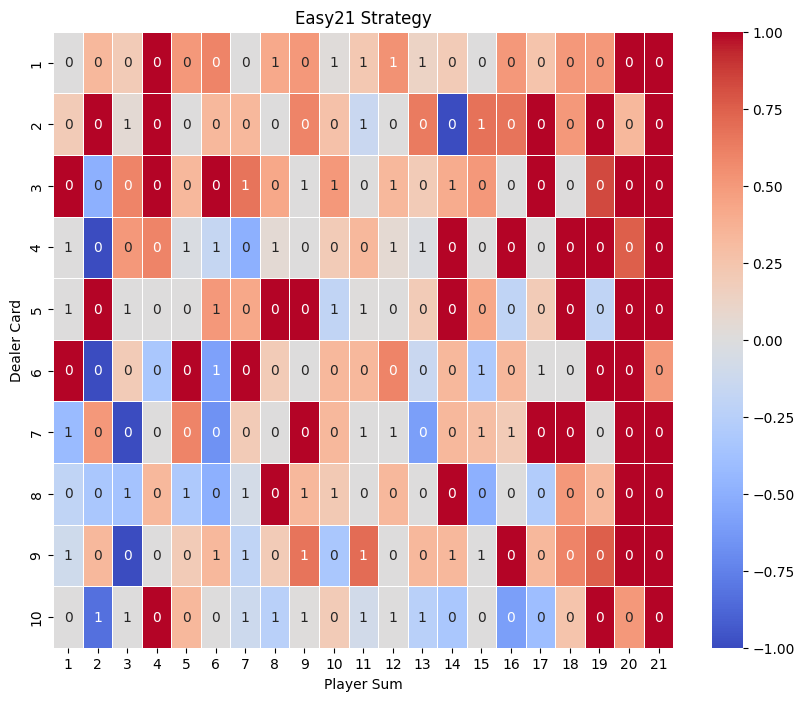

In [ ]:
data = np.zeros((10, 21))
labels = np.zeros((10, 21))
for i in range(10):
    for j in range(21):
        data[i, j] = optimal_Vs[(i+1, j+1)]
        labels[i, j] = optimal_policy[(i+1, j+1)]

df = pd.DataFrame(data, columns=[f'{i}' for i in range(1, 22)],
                  index=[f'{i}' for i in range(1, 11)])

# Step 3: Create the heatmap with custom labels
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=labels.astype('int'), cmap='coolwarm', fmt='', linewidths=.5)
plt.title('Easy21 Strategy')
ax.set_xlabel('Player Sum')
ax.set_ylabel('Dealer Card')
plt.show()

#Function Approximation

In [55]:
def phi(state, a):
    feature_vector = np.zeros((3, 6, 2))
    dealer_card, player_sum = state

    dealer_positions = []
    if dealer_card <= 4:
        dealer_positions.append(0)
    if dealer_card >= 4 and dealer_card <= 7:
        dealer_positions.append(1)
    if dealer_card >= 7:
        dealer_positions.append(2)

    player_positions = []
    if player_sum <= 6:
        player_positions.append(0)
    if (player_sum >= 4 and player_sum <= 9):
        player_positions.append(1)
    if (player_sum >= 7 and player_sum <= 12):
        player_positions.append(2)
    if (player_sum >= 10 and player_sum <= 15):
        player_positions.append(3)
    if (player_sum >= 13 and player_sum <= 18):
        player_positions.append(4)
    if (player_sum >= 16 and player_sum <= 21):
        player_positions.append(5)

    feature_vector[dealer_positions, player_positions, a] = 1

    return feature_vector.reshape(-1, 1)

In [56]:
def eps_greedy_approx_exploration(theta, state, eps = 0.05, n_0 = 100):
    #eps = n_0 / (n_0 + n_s)
    p = np.random.random()
    if p < eps:
        next_a = np.random.choice([0, 1])
    else:
        Q = [(phi(state, a).T).dot(theta) for a in [0, 1]]
        next_a = Q.index(max(Q))
    return next_a

In [67]:
lambdas = np.array(range(11))/10
epochs = 3000
alpha = 0.01
thetas = []

for lbda in lambdas:
    #Q = {}
    N_sa = {}
    theta = np.random.randn(36, 1)

    for state in list(product(range(1,11), range(1, 22))):
        #Q[state] = [0, 0]
        N_sa[state] = [0, 0]

    for epoch in range(epochs):
        E_sa = np.zeros((36, 1))
        # E_sa = {}
        # for state in list(product(range(1,11), range(1, 22))):
        #     E_sa[state] = [0, 0]

        state = (np.random.choice(range(1, 11)), np.random.choice(range(1, 22)))
        a = eps_greedy_approx_exploration(theta, state, sum(N_sa[state]))

        done = False
        while not done:
            N_sa[state][a] += 1
            next_state, r, done = step(state, a)
            if done:
                delta = r - (phi(state, a).T).dot(theta)
            else:
                next_a = eps_greedy_approx_exploration(theta, next_state, sum(N_sa[state]))
                delta = r + (phi(next_state, next_a).T).dot(theta) - (phi(state, a).T).dot(theta)
                E_sa = lbda * E_sa + phi(state, a)
            #for s in list(product(range(1,11), range(1, 22))):
                #for a in range(2):
            theta += alpha * delta * E_sa
            #E_sa[state][a] *= lbda

            state = next_state
            a = next_a
    thetas.append(theta)

In [74]:
theta = thetas[5]

In [75]:
optimal_policy = {}
optimal_Vs = {}

for i in range(1, 11):
    for j in range(1, 22):
        Q = [(phi((i, j), a).T).dot(theta) for a in [0, 1]]
        max_val = max(Q)
        a = Q.index(max_val)
        optimal_policy[(i, j)] = a
        optimal_Vs[(i, j)] = max_val

<ipython-input-76-08bf2c619f3e>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[i, j] = optimal_Vs[(i+1, j+1)]


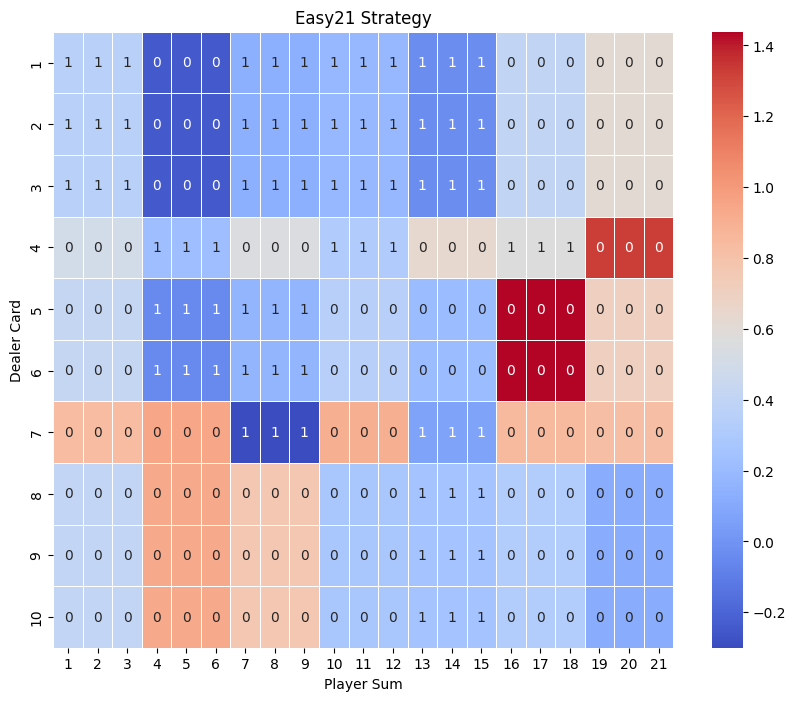

In [76]:
data = np.zeros((10, 21))
labels = np.zeros((10, 21))
for i in range(10):
    for j in range(21):
        data[i, j] = optimal_Vs[(i+1, j+1)]
        labels[i, j] = optimal_policy[(i+1, j+1)]

df = pd.DataFrame(data, columns=[f'{i}' for i in range(1, 22)],
                  index=[f'{i}' for i in range(1, 11)])

# Step 3: Create the heatmap with custom labels
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=labels.astype('int'), cmap='coolwarm', fmt='', linewidths=.5)
plt.title('Easy21 Strategy')
ax.set_xlabel('Player Sum')
ax.set_ylabel('Dealer Card')
plt.show()